In [ ]:
"""📊 General Analysis
What are the top 10 locations with the highest number of restaurants?

Which cuisines are most commonly served across restaurants?

What is the average rating of restaurants in each location?

Which restaurants have the highest number of votes?

What is the most common cost for two people?

📈 Ratings Analysis
What is the distribution of restaurant ratings?

Is there a relationship between rating and number of votes?

Do restaurants with online ordering tend to have higher ratings?

How do ratings differ across locations?

💰 Cost Analysis
Which locations have the highest average cost for two?

Is there a correlation between cost and rating?

How does average cost differ for restaurants that offer online ordering?

📍 Location & Cuisine-Based
Which cuisine is the most popular in Koramangala?

Which location has the most restaurants serving North Indian cuisine?

What are the top-rated cuisines on average?

📦 Online Ordering Impact
How many restaurants offer online ordering vs not?

What is the average rating for restaurants with vs without online ordering?

Is online ordering more common in any particular location?

🏅 Top Performers
Which are the top 10 highest-rated restaurants overall?

Which restaurant has the maximum votes in each location?"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ladwa\Desktop\forproj\zomato.csv")

In [3]:
df.head()

,name,location,rate,votes,approx_cost(for two people),cuisines,online_order
0,Meghana Foods,HSR,2.7,1410,800,"Fast Food, South Indian",No
1,Burger King,Koramangala,4.6,1724,700,"Biryani, Mexican",Yes
2,Domino's,HSR,4.6,1070,1000,"Italian, American",No
3,McDonald's,Marathahalli,4.2,1109,1000,"North Indian, South Indian",Yes
4,Truffles,Rajajinagar,4.6,2728,300,"American, Cafe",Yes


In [4]:
df.isnull().sum()

name                           0
location                       0
rate                           0
votes                          0
approx_cost(for two people)    0
cuisines                       0
online_order                   0
dtype: int64

In [5]:
df.dropna()

,name,location,rate,votes,approx_cost(for two people),cuisines,online_order
0,Meghana Foods,HSR,2.7,1410,800,"Fast Food, South Indian",No
1,Burger King,Koramangala,4.6,1724,700,"Biryani, Mexican",Yes
2,Domino's,HSR,4.6,1070,1000,"Italian, American",No
3,McDonald's,Marathahalli,4.2,1109,1000,"North Indian, South Indian",Yes
4,Truffles,Rajajinagar,4.6,2728,300,"American, Cafe",Yes
...,...,...,...,...,...,...,...
245,Domino's,Jayanagar,2.9,1934,300,"South Indian, Italian",Yes
246,Burger King,Jayanagar,3.2,4813,600,"Biryani, Italian",Yes
247,Pizza Hut,HSR,3.8,1671,300,"South Indian, South Indian",Yes
248,Domino's,Bellandur,3.4,1650,800,"Cafe, South Indian",No


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,rate,votes,approx_cost(for two people)
count,250.000000,250.000000,250.000000
mean,3.720400,2386.792000,573.600000
std,0.742799,1456.627225,256.527318
min,2.500000,12.000000,200.000000
25%,3.100000,1071.000000,300.000000
50%,3.700000,2331.000000,600.000000
75%,4.400000,3584.250000,800.000000
max,5.000000,4999.000000,1000.000000


In [8]:
df.dtypes

name                            object
location                        object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
cuisines                        object
online_order                    object
dtype: object

In [9]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost(for two people)',
       'cuisines', 'online_order'],
      dtype='object')

In [10]:
df.rename(columns={"approx_cost(for two people)":"approx_cost"},inplace=True)

In [11]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

In [12]:
"""📊 General Analysis
What are the top 10 locations with the highest number of restaurants?

Which cuisines are most commonly served across restaurants?

What is the average rating of restaurants in each location?

Which restaurants have the highest number of votes?

What is the most common cost for two people?"""

'📊 General Analysis\nWhat are the top 10 locations with the highest number of restaurants?\n\nWhich cuisines are most commonly served across restaurants?\n\nWhat is the average rating of restaurants in each location?\n\nWhich restaurants have the highest number of votes?\n\nWhat is the most common cost for two people?'

In [15]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

In [13]:
#What are the top 10 locations with the highest number of restaurants?
df.groupby("location")["name"].count().sort_values(ascending=False)

location
Koramangala     31
Indiranagar     30
Jayanagar       30
MG Road         29
HSR             27
Bellandur       23
Marathahalli    23
BTM             21
Rajajinagar     20
Whitefield      16
Name: name, dtype: int64

In [16]:
#Which cuisines are most commonly served across restaurants?
df["cuisines"].value_counts()

cuisines
Desserts, Biryani        6
North Indian, Chinese    6
Italian, Desserts        5
Cafe, South Indian       5
Chinese, Desserts        5
                        ..
Fast Food, Fast Food     1
Biryani, North Indian    1
Desserts, American       1
Mexican, South Indian    1
Biryani, American        1
Name: count, Length: 96, dtype: int64

In [17]:
#What is the average rating of restaurants in each location?
df.groupby("location")["rate"].mean()

location
BTM             3.542857
Bellandur       3.695652
HSR             3.948148
Indiranagar     3.683333
Jayanagar       3.700000
Koramangala     3.696774
MG Road         3.696552
Marathahalli    3.778261
Rajajinagar     3.720000
Whitefield      3.718750
Name: rate, dtype: float64

In [19]:
#Which restaurants have the highest number of votes?
df.groupby("name")["votes"].sum().sort_values(ascending=False)

name
Truffles         72161
Meghana Foods    71802
Pizza Hut        67572
Empire           64376
Burger King      63581
Domino's         60989
Subway           57742
Taco Bell        52254
McDonald's       44460
KFC              41761
Name: votes, dtype: int64

In [24]:
#What is the most common cost for two people?"""
f_1=df["approx_cost"].value_counts()
f_1

approx_cost
800     39
300     37
1000    35
400     31
600     30
200     27
500     27
700     24
Name: count, dtype: int64

In [ ]:
"""📈 Ratings Analysis
What is the distribution of restaurant ratings?

Is there a relationship between rating and number of votes?

Do restaurants with online ordering tend to have higher ratings?

How do ratings differ across locations?
"""

In [25]:
df.head()

,name,location,rate,votes,approx_cost,cuisines,online_order
0,Meghana Foods,HSR,2.7,1410,800,"Fast Food, South Indian",No
1,Burger King,Koramangala,4.6,1724,700,"Biryani, Mexican",Yes
2,Domino's,HSR,4.6,1070,1000,"Italian, American",No
3,McDonald's,Marathahalli,4.2,1109,1000,"North Indian, South Indian",Yes
4,Truffles,Rajajinagar,4.6,2728,300,"American, Cafe",Yes


In [26]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

Text(0.5, 1.0, 'distribution of restaurant ratings')

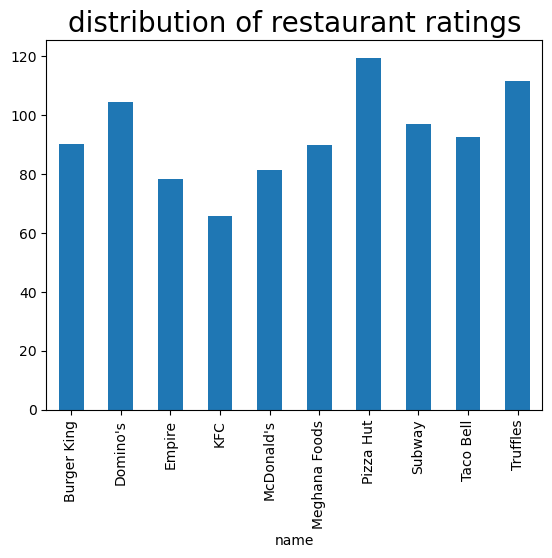

In [30]:
#What is the distribution of restaurant ratings?
df.groupby("name")["rate"].sum().plot(kind="bar")
plt.title("distribution of restaurant ratings",fontsize=20)

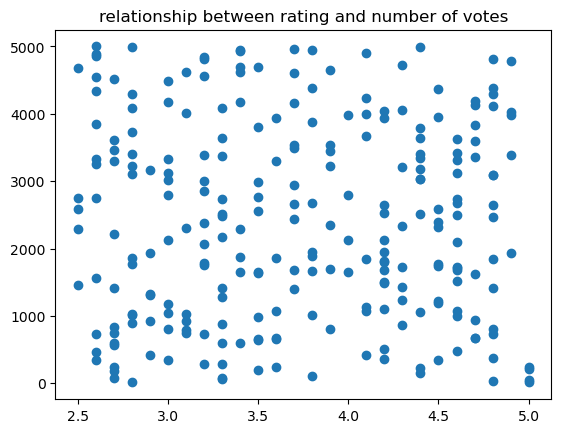

In [32]:
#Is there a relationship between rating and number of votes?
plt.scatter(df["rate"],df["votes"])
plt.title("relationship between rating and number of votes")
plt.show()

In [39]:
#Do restaurants with online ordering tend to have higher ratings?
df[df["online_order"]=="Yes"].groupby("name")["rate"].sum()

name
Burger King      42.3
Domino's         55.4
Empire           32.0
KFC              39.6
McDonald's       32.0
Meghana Foods    48.0
Pizza Hut        63.7
Subway           50.5
Taco Bell        29.3
Truffles         65.7
Name: rate, dtype: float64

In [37]:
avg_df=df.groupby("online_order")["rate"].mean()
avg_df

online_order
No     3.684375
Yes    3.758197
Name: rate, dtype: float64

<Axes: xlabel='online_order'>

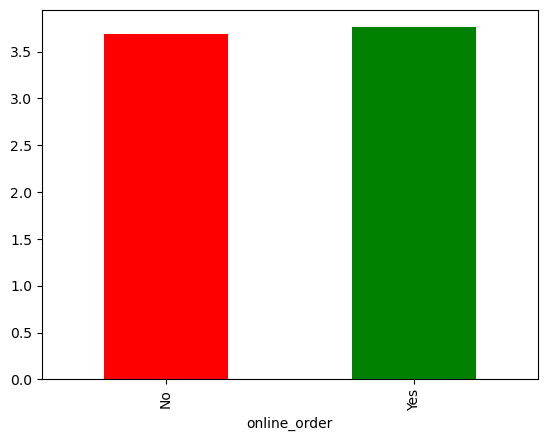

In [38]:
avg_df.plot(kind="bar",color=["red","green"])

In [45]:
#How do ratings differ across locations?
fil_2=df.groupby("location")["rate"].mean().reset_index()

In [46]:
fil_2

,location,rate
0,BTM,3.542857
1,Bellandur,3.695652
2,HSR,3.948148
3,Indiranagar,3.683333
4,Jayanagar,3.700000
5,Koramangala,3.696774
6,MG Road,3.696552
7,Marathahalli,3.778261
8,Rajajinagar,3.720000
9,Whitefield,3.718750


<Axes: xlabel='location'>

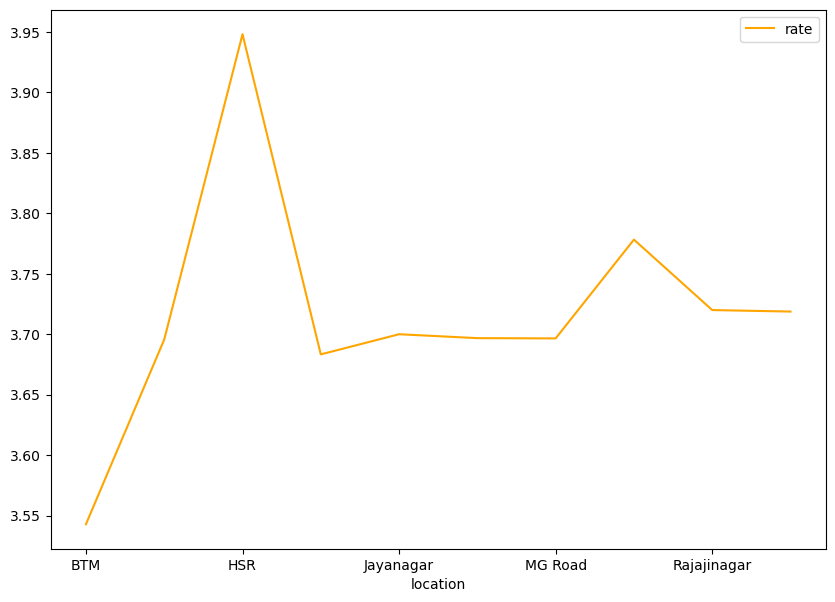

In [49]:
fil_2.plot(x="location",y="rate",figsize=(10,7),color="orange")

In [ ]:
"""💰 Cost Analysis
Which locations have the highest average cost for two?

Is there a correlation between cost and rating?

How does average cost differ for restaurants that offer online ordering?
"""

In [50]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

In [53]:
#Which locations have the highest average cost for two?
df.groupby("location")["approx_cost"].mean().sort_values(ascending=False).head(2).reset_index()

,location,approx_cost
0,Marathahalli,665.217391
1,MG Road,637.931034


In [57]:
#Is there a correlation between cost and rating?
corr_df=df["rate"].corr(df["approx_cost"])
corr_df

0.023281786065641345

<Axes: ylabel='approx_cost'>

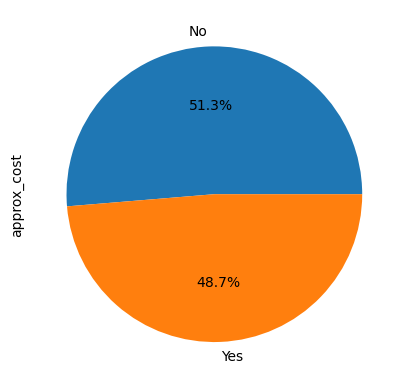

In [65]:
#How does average cost differ for restaurants that offer online ordering?
fil_3=df.groupby("online_order")["approx_cost"].mean().reset_index()
fil_3.set_index("online_order")["approx_cost"].plot(kind="pie",color=["red","green"],autopct="%1.1f%%")

In [66]:
"""📍 Location & Cuisine-Based
Which cuisine is the most popular in Koramangala?

Which location has the most restaurants serving North Indian cuisine?

What are the top-rated cuisines on average?
"""

'📍 Location & Cuisine-Based\nWhich cuisine is the most popular in Koramangala?\n\nWhich location has the most restaurants serving North Indian cuisine?\n\nWhat are the top-rated cuisines on average?\n'

In [67]:
df.head()

,name,location,rate,votes,approx_cost,cuisines,online_order
0,Meghana Foods,HSR,2.7,1410,800,"Fast Food, South Indian",No
1,Burger King,Koramangala,4.6,1724,700,"Biryani, Mexican",Yes
2,Domino's,HSR,4.6,1070,1000,"Italian, American",No
3,McDonald's,Marathahalli,4.2,1109,1000,"North Indian, South Indian",Yes
4,Truffles,Rajajinagar,4.6,2728,300,"American, Cafe",Yes


In [68]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

In [78]:
#Which cuisine is the most popular in Koramangala?
new_df=df[df["location"]=="Koramangala"]
new_df["cuisines"].value_counts()

cuisines
Biryani, Mexican              2
Fast Food, American           2
Desserts, Mexican             2
American, South Indian        2
Italian, North Indian         2
Desserts, Biryani             2
Chinese, American             1
Cafe, American                1
Biryani, Chinese              1
Fast Food, North Indian       1
Biryani, Desserts             1
Desserts, North Indian        1
American, Desserts            1
American, Fast Food           1
Fast Food, Mexican            1
South Indian, North Indian    1
Mexican, American             1
Mexican, Fast Food            1
Italian, Cafe                 1
Biryani, Biryani              1
American, North Indian        1
Desserts, Cafe                1
Cafe, Cafe                    1
Mexican, Chinese              1
North Indian, Mexican         1
Name: count, dtype: int64

In [89]:
#Which location has the most restaurants serving North Indian cuisine?
fil_4=df[df["cuisines"].str.contains("North Indian",na=False)]
fil_4["location"].value_counts()

location
Marathahalli    8
Koramangala     7
HSR             5
Jayanagar       5
MG Road         5
BTM             4
Rajajinagar     4
Indiranagar     4
Whitefield      3
Bellandur       2
Name: count, dtype: int64

In [90]:
#What are the top-rated cuisines on average?
df["cuisines"].value_counts()

cuisines
Desserts, Biryani        6
North Indian, Chinese    6
Italian, Desserts        5
Cafe, South Indian       5
Chinese, Desserts        5
                        ..
Fast Food, Fast Food     1
Biryani, North Indian    1
Desserts, American       1
Mexican, South Indian    1
Biryani, American        1
Name: count, Length: 96, dtype: int64

In [92]:
df.groupby("cuisines")["rate"].mean().sort_values(ascending=False)

cuisines
American, Desserts         4.85
Italian, Fast Food         4.80
Chinese, Cafe              4.80
South Indian, American     4.70
Mexican, North Indian      4.70
                           ... 
Italian, Chinese           3.00
Fast Food, South Indian    3.00
Chinese, Fast Food         2.85
Cafe, North Indian         2.65
Chinese, Chinese           2.60
Name: rate, Length: 96, dtype: float64

In [ ]:
"""📦 Online Ordering Impact
How many restaurants offer online ordering vs not?

What is the average rating for restaurants with vs without online ordering?

Is online ordering more common in any particular location?"""

In [93]:
df.head()

,name,location,rate,votes,approx_cost,cuisines,online_order
0,Meghana Foods,HSR,2.7,1410,800,"Fast Food, South Indian",No
1,Burger King,Koramangala,4.6,1724,700,"Biryani, Mexican",Yes
2,Domino's,HSR,4.6,1070,1000,"Italian, American",No
3,McDonald's,Marathahalli,4.2,1109,1000,"North Indian, South Indian",Yes
4,Truffles,Rajajinagar,4.6,2728,300,"American, Cafe",Yes


In [94]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

In [97]:
#How many restaurants offer online ordering vs not?
df.groupby("online_order")["name"].count()

online_order
No     128
Yes    122
Name: name, dtype: int64

<Axes: xlabel='online_order'>

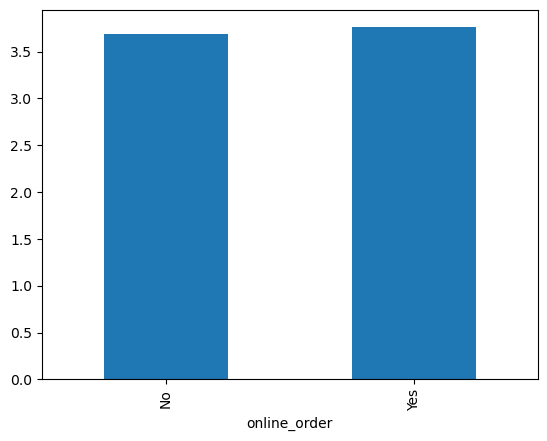

In [99]:
#What is the average rating for restaurants with vs without online ordering?
df.groupby("online_order")["rate"].mean().plot(kind="bar")

In [104]:
#Is online ordering more common in any particular location?"""
fil_5=df[df["online_order"]=="Yes"]
fil_5["location"].value_counts()

location
Jayanagar       18
Indiranagar     16
MG Road         16
HSR             14
Koramangala     13
BTM             12
Marathahalli    10
Whitefield       9
Bellandur        9
Rajajinagar      5
Name: count, dtype: int64

In [105]:
len(fil_5)

122

In [ ]:
"""🏅 Top Performers
Which are the top 10 highest-rated restaurants overall?

Which restaurant has the maximum votes in each location?"""

In [106]:
df.head()

,name,location,rate,votes,approx_cost,cuisines,online_order
0,Meghana Foods,HSR,2.7,1410,800,"Fast Food, South Indian",No
1,Burger King,Koramangala,4.6,1724,700,"Biryani, Mexican",Yes
2,Domino's,HSR,4.6,1070,1000,"Italian, American",No
3,McDonald's,Marathahalli,4.2,1109,1000,"North Indian, South Indian",Yes
4,Truffles,Rajajinagar,4.6,2728,300,"American, Cafe",Yes


In [107]:
df.columns

Index(['name', 'location', 'rate', 'votes', 'approx_cost', 'cuisines',
       'online_order'],
      dtype='object')

In [114]:
#Which are the top 10 highest-rated restaurants overall?
fil_5=df.groupby("name")[["rate","votes"]].sum().sort_values(by="rate",ascending=False)
fil_5

,rate,votes
name,,
Pizza Hut,119.4,67572
Truffles,111.5,72161
Domino's,104.5,60989
Subway,96.9,57742
Taco Bell,92.4,52254
Burger King,90.1,63581
Meghana Foods,89.9,71802
McDonald's,81.2,44460
Empire,78.4,64376


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pizza Hut'),
  Text(1, 0, 'Truffles'),
  Text(2, 0, "Domino's"),
  Text(3, 0, 'Subway'),
  Text(4, 0, 'Taco Bell'),
  Text(5, 0, 'Burger King'),
  Text(6, 0, 'Meghana Foods'),
  Text(7, 0, "McDonald's"),
  Text(8, 0, 'Empire'),
  Text(9, 0, 'KFC')])

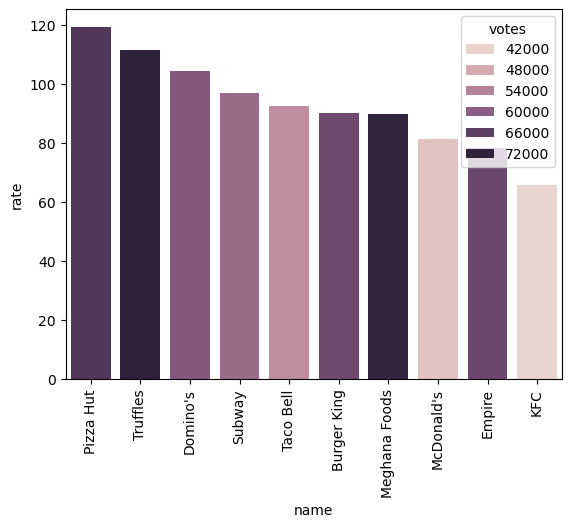

In [116]:
sns.barplot(data=fil_5,x="name",y="rate",hue="votes")
plt.xticks(rotation=90)

In [121]:
#Which restaurant has the maximum votes in each location?"""
max_vot=df.groupby("location")["votes"].sum()
max_vot

location
BTM             57246
Bellandur       55010
HSR             57281
Indiranagar     55275
Jayanagar       83829
Koramangala     77105
MG Road         73525
Marathahalli    45602
Rajajinagar     54960
Whitefield      36865
Name: votes, dtype: int64

In [125]:
top_vot=df.sort_values(["location","votes"],ascending=[True,False])

In [130]:
top_vot[["location", "name", "votes"]]

,location,name,votes
122,BTM,KFC,4951
84,BTM,Truffles,4699
36,BTM,KFC,4560
240,BTM,Pizza Hut,4547
157,BTM,Pizza Hut,4166
...,...,...,...
97,Whitefield,Burger King,1184
229,Whitefield,Taco Bell,883
181,Whitefield,Burger King,812
55,Whitefield,Pizza Hut,677
